# Dimensionality reduction

In this task you will practice dimensionality reduction.
Use code cells to answer the Tasks and Markdown cells for the Questions (Q's).

In [258]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np


# Load data

In [259]:
(X, y) = load_wine(return_X_y=True)

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0,stratify=y)

Lets take a quick look at the data:

In [260]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,13.031792,2.332642,2.367170,19.701887,98.556604,2.282170,1.981509,0.375755,1.620849,5.150472,0.951321,2.617830,756.915094
std,0.821117,1.126702,0.271797,3.159023,13.749514,0.573592,1.013492,0.124869,0.592705,2.443026,0.216509,0.680315,326.825135
min,11.460000,0.890000,1.700000,12.000000,70.000000,1.250000,0.470000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.332500,1.632500,2.210000,17.500000,88.000000,1.800000,1.017500,0.270000,1.252500,3.180000,0.802500,1.972500,510.000000
50%,13.135000,1.845000,2.350000,19.500000,97.000000,2.210000,2.035000,0.360000,1.545000,4.800000,0.960000,2.795000,675.000000
75%,13.677500,3.135000,2.580000,21.575000,105.750000,2.787500,2.855000,0.477500,1.970000,6.200000,1.097500,3.167500,1023.750000
max,14.830000,5.650000,3.230000,28.500000,151.000000,3.380000,5.080000,0.630000,3.580000,13.000000,1.420000,4.000000,1680.000000


# PCA + SVM

Task 1: Use X_train, y_train to train a SVM (SKlean's SVC) with the deafult parameters. You can read more about the algorithm in SKlearn's documentation.
Make sure you normailize the data by using StandardScaler
Evaulate the algorithm using accuracy score and X_test, y_test.

In [261]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def calc_score(model, do_pca=False):
    if do_pca:
        pp_svc = make_pipeline(StandardScaler(), PCA(), model())
        text = f'For {model.__name__} after PCA'
    else:
        pp_svc = make_pipeline(StandardScaler(), model())
        text = f'For {model.__name__} without PCA'
    pp_svc.fit(X_train, y_train)
    print(f'{text}, basic params on test: {pp_svc.score(X_test, y_test):.4f}')

Task 2: Now do the same, but use PCA.

In this task, we want to keep all of the variance! No data is going to be discarded.
You are asked to use the maximal number of componenets for PCA.

Q1: Your co-worker says that the results should be at least as good as the results we had without PCA. Explain why might he say that.

Print the accuracy of SVM + PCA.

In [262]:
calc_score(SVC)
calc_score(SVC, True)

For SVC without PCA, basic params on test: 0.9861
For SVC after PCA, basic params on test: 0.9861


Q2: Did the results improve\stayed the same\got worse? 

### Answer:

PCA only rotates the frame of reference, but does not change the position of the points or the relations between them, so we dont anticipate it should have any impact on SVM results, as indeed we see in this example. As long as we keep all the deems after PCA we do not change the orientation between the points inside the data and therefore not change the result for the SVC that searching for the plane that stays the same relatively to the data.

# PCA + logistice regression

Task 3: repeat task 1 with logistic regression.

Task 4: repeast task 2 with logistic regression.

In [263]:
calc_score(LogisticRegression)
calc_score(LogisticRegression, True)

For LogisticRegression without PCA, basic params on test: 0.9861
For LogisticRegression after PCA, basic params on test: 0.9861


Q3: Did the results improved\stayed the same\got worse?

Q4: How can you explain the difference between answers to Q2 and Q3. Hint: think about the nature of Logistic regression and the main difference of SVM from it. Hint: SVM assumes the data can be seperated by an hyperplan.

### Answer:
Once again, because logistic regression labels samples using a hyperplane that can have any orientation, the rotation of the frame of reference had no effect.

In [264]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

calc_score(GaussianNB)
calc_score(GaussianNB, True)
calc_score(RandomForestClassifier)
calc_score(RandomForestClassifier, True)


For GaussianNB without PCA, basic params on test: 0.9722
For GaussianNB after PCA, basic params on test: 0.9306
For RandomForestClassifier without PCA, basic params on test: 0.9861
For RandomForestClassifier after PCA, basic params on test: 0.9444


### Comments:
This time, using random forest, we see a negative impact by the PCA algorithm (also when accounting for the random element of RF). This is because decision trees can only separate the sample space with right angles. The PCA can have a negative or positive effect, depending on the samples.

# Visualizing

Task 5: Use locally linear embedding in sklearn to visualize the data. Plot the results.
Optimze the n_neighbors by running at least 5 times and use the best looking result you can find.

In [265]:
(X, y) = load_wine(return_X_y=True)

# Let's define the function that will plot the data for the specific model:
def plot_blobs(model, X, y):
    pipeline = make_pipeline(StandardScaler(),model)
    X_transformed = pipeline.fit_transform(X)
    plots=[]
    plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)
    plt.legend(plots,np.unique(y))
    plt.title(f'{model}')
    plt.show()


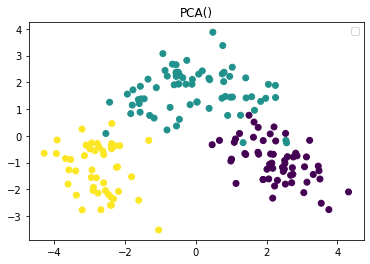

In [266]:
model = PCA()
plot_blobs(model, X, y)

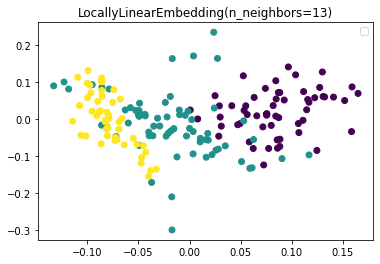

In [267]:
model = LocallyLinearEmbedding(n_components=2,n_neighbors=13)
plot_blobs(model, X, y)


Task 6: Use t-SNE to visualize the data. Plot the results.

/Users/tansla/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/tansla/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


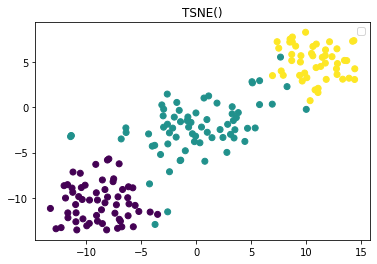

In [268]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)
plot_blobs(tsne, X, y)

Task 7: Use UMAP to visualize the data. Plot the results.

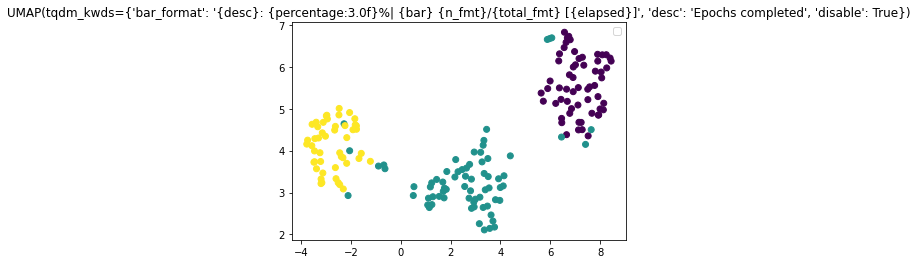

In [269]:
import umap

umap = umap.UMAP() 
plot_blobs(umap, X, y)


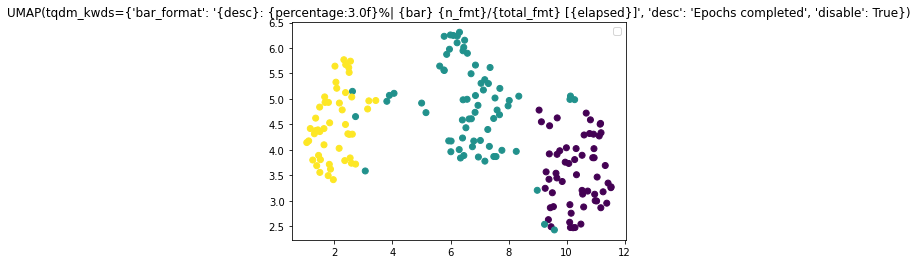

In [270]:
import umap

umap = umap.UMAP() 
plot_blobs(umap, X, y)


Q5: If we run one of this visualziaing algorithms various times with the default parameters, are we guranteed to see the same results? Why?

### Answer:
For the TSNE and UMAP results would not be the same each time, because:
1. t-SNE is based on probability distribution and has a cost function that is not convex
2. UMAP as an imporve version of the t-SNE